In [1]:
import numpy as np
import scipy.constants as c
import matplotlib.pyplot as plt
import constants as my_c
import util
import topological_susceptibility as top_sus

$$
m_a^2(T) f_a^2 = \chi_\mathrm{top}
$$

In [62]:
Lambda_shellard = 400e6
def calc_m_a_shellard_low_T(T):
    m_a_shellard_low_T = np.sqrt(
        1.46e-3 * Lambda_shellard**4 *
        (1 + 0.5*T/Lambda_shellard) /
        (1 + (3.53*T/Lambda_shellard)**7.48)
    ) / f_a
    return m_a_shellard_low_T

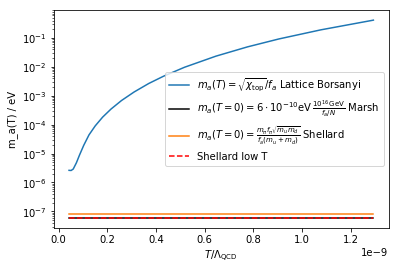

In [61]:
f_a = 1e14 * 1e9
N = 1

m_a_from_chi = np.sqrt(top_sus.chi) / f_a # from chi from the Borsanyi paper
plt.semilogy(top_sus.T / my_c.Lambda_QCD, m_a_from_chi, label=r"$m_a(T) = \sqrt{\chi_\mathrm{top}} / f_a$ Lattice Borsanyi")

m_a_at_abs_zero = 6e-10 * 1e16 * 1e9 / (f_a / N) # from marsh paper
plt.semilogy(top_sus.T / my_c.Lambda_QCD, m_a_at_abs_zero * np.ones(np.size(top_sus.T)), color="black",
             label=r"$m_a(T = 0) = 6 \cdot 10^{-10} \mathrm{eV} \, \frac{10^{16} \, \mathrm{GeV}}{f_a / N}$ Marsh")

m_u = 2.2e6
m_d = 4.6e6
f_pi = 130e6 # correct? different values for pi0 pi+/-???
m_pi = 135e6
m_a_at_abs_zero_2 = m_pi * f_pi / f_a * np.sqrt(m_u * m_d) / (m_u + m_d) # from shellard paper
plt.semilogy(top_sus.T / my_c.Lambda_QCD, m_a_at_abs_zero_2 * np.ones(np.size(top_sus.T)),
            label=r"$m_a(T = 0) = \frac{m_\pi f_\pi \sqrt{m_u m_d}}{f_a (m_u + m_d)}$ Shellard")

plt.semilogy(top_sus.T / my_c.Lambda_QCD, calc_m_a_shellard_low_T(top_sus.T), 
             color="red", linestyle="--", label="Shellard low T")

plt.xlabel(r"$T / \Lambda_\mathrm{QCD}$")
plt.ylabel("m_a(T) / eV")
plt.legend()

power in shellard: 3.340000e+00 power in fox: 4.000000e+00 


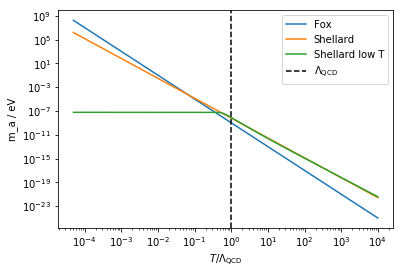

In [63]:
T = np.logspace(4, np.log10(1e4 * my_c.Lambda_QCD), 300)

# fox
C = 0.018
n_fox = 4
m_a_fox = C * m_a_at_abs_zero * (my_c.Lambda_QCD / T)**n_fox
plt.loglog(T / my_c.Lambda_QCD, m_a_fox, label="Fox")


# shellard
n_shellard = 6.68
alpha_a = 1.68e-7
m_a_shellard = np.sqrt(alpha_a) * Lambda_shellard**2 / (f_a * (T / Lambda_shellard)**(n_shellard/2))
plt.loglog(T / my_c.Lambda_QCD, m_a_shellard, label="Shellard", )

# low T shellard
m_a_shellard_low_T = calc_m_a_shellard_low_T(T)
plt.loglog(T / my_c.Lambda_QCD, m_a_shellard_low_T, label="Shellard low T")

# deko
util.show("power in shellard:", n_shellard / 2, "power in fox:", n_fox)
plt.axvline(1, label=r"$\Lambda_\mathrm{QCD}$", color="black", linestyle="--")
plt.xlabel(r"$T / \Lambda_\mathrm{QCD}$")
plt.ylabel("m_a / eV")
plt.legend()

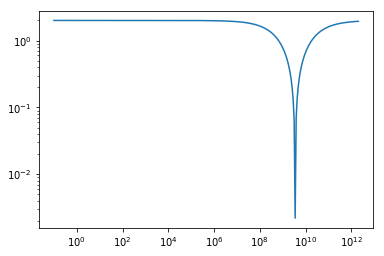

In [16]:
plt.loglog(T, 2 * np.abs(m_a_fox - m_a_shellard) / (m_a_fox + m_a_shellard))

Text(0,0.5,'m_a / eV')

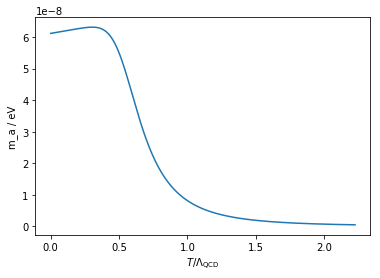

In [65]:
T = np.linspace(0, 1.1125 * Lambda_shellard, 300)
plt.plot(T / my_c.Lambda_QCD, calc_m_a_shellard_low_T(T))
plt.xlabel(r"$T / \Lambda_\mathrm{QCD}$")
plt.ylabel("m_a / eV")
